# Regressão a Vista

Hora de prever mais de uma variável...

In [1]:
## Bibliotecas
import pandas as pd
import numpy as np
import tensorflow as tf

## Full Connected Neural Network / Dense Neural Network / Standard Neural Network

Mesma rede, menos paciência... Agora vamos adicionar mais variáveis em X e parar quando estiver bom! =D



### Base de dados

In [2]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                     sep=';')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [3]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)

In [4]:
# Limpando sessão e setando semente

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [5]:
model = tf.keras.Sequential()

In [6]:
# Adicionando 1 camada com 1 neurônio

model.add(tf.keras.layers.Dense(units=1, input_shape=[11]))

In [7]:
#Compilando o modelo

model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
### Entendendo o modelo

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X, y, epochs=500,
                    validation_split=0.2, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience = 20)])

8
Epoch 123/500
40/40 [==============================] - 0s 3ms/step - loss: 2.9210 - val_loss: 3.3042
Epoch 124/500
40/40 [==============================] - 0s 3ms/step - loss: 2.7922 - val_loss: 3.1922
Epoch 125/500
40/40 [==============================] - 0s 3ms/step - loss: 2.7359 - val_loss: 3.1017
Epoch 126/500
40/40 [==============================] - 0s 3ms/step - loss: 2.5968 - val_loss: 3.0145
Epoch 127/500
40/40 [==============================] - 0s 3ms/step - loss: 2.6041 - val_loss: 2.9225
Epoch 128/500
40/40 [==============================] - 0s 3ms/step - loss: 2.5337 - val_loss: 2.8225
Epoch 129/500
40/40 [==============================] - 0s 3ms/step - loss: 2.5667 - val_loss: 2.7518
Epoch 130/500
40/40 [==============================] - 0s 2ms/step - loss: 2.4123 - val_loss: 2.6672
Epoch 131/500
40/40 [==============================] - 0s 2ms/step - loss: 2.3255 - val_loss: 2.5816
Epoch 132/500
40/40 [==============================] - 0s 2ms/step - loss: 2.3614 - val_l

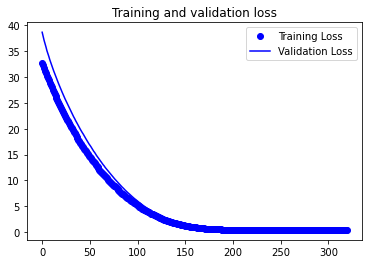

In [10]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
print("Loss: {:.2} - Val_loss: {:.2}".format(loss[-1], val_loss[-1]))

Loss: 0.42 - Val_loss: 0.43
